In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
ticker = yf.Ticker("SMBK")

In [3]:
ticker.recommendations['To Grade']

Date
2016-08-29 07:28:52        Outperform
2018-04-10 20:04:08    Market Perform
2018-04-26 13:54:44        Outperform
2018-06-26 12:08:48      Equal-Weight
2018-10-25 15:20:32        Outperform
2019-03-04 14:20:33               Buy
2019-07-11 11:39:55           Neutral
2019-07-29 10:52:48    Market Perform
2019-11-04 14:17:50               Buy
2020-07-23 10:31:32        Outperform
2021-01-21 12:19:33        Outperform
2021-04-22 17:31:42        Strong Buy
2021-07-22 12:07:08        Overweight
2022-01-26 12:32:42        Strong Buy
2022-07-07 11:56:20        Outperform
Name: To Grade, dtype: object

In [4]:
df = pd.DataFrame(ticker.history(period="1y"))
df.index
y = df['Close'].values.reshape(-1, 1)
X = df.index.values.reshape(-1, 1)

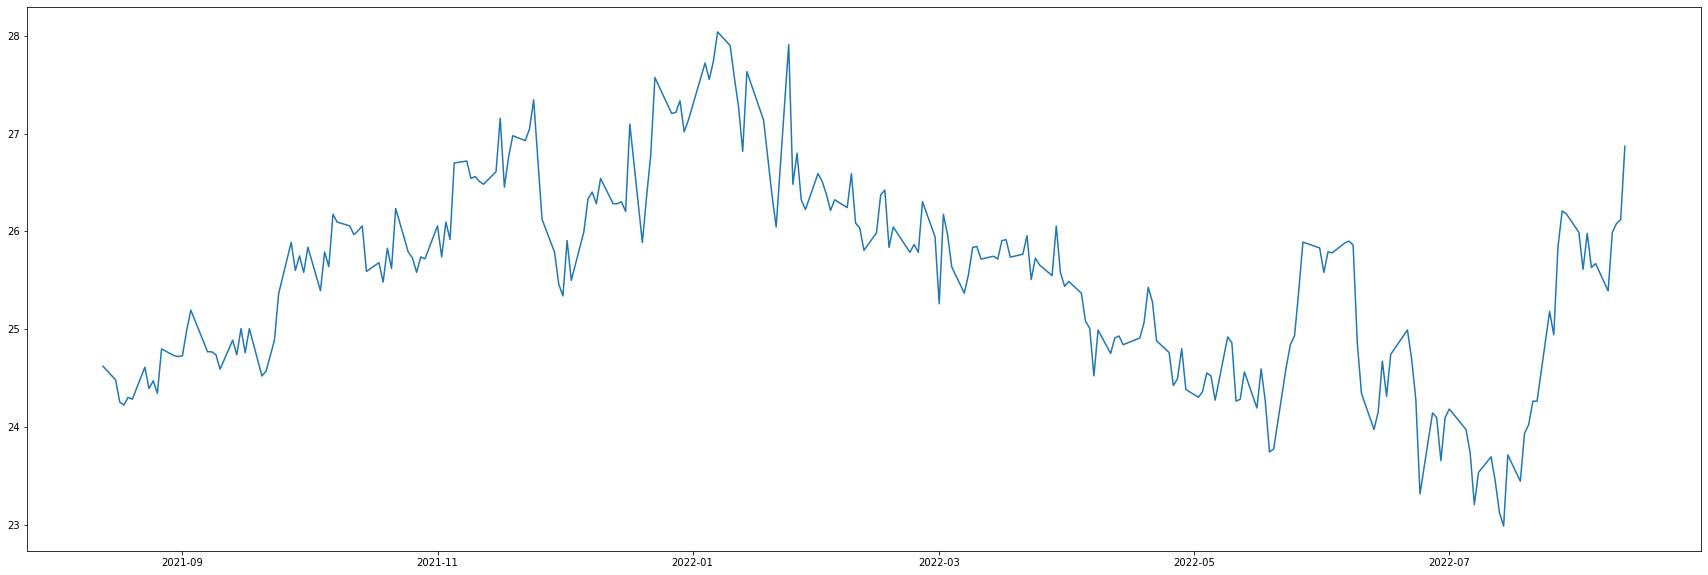

In [5]:
plt.figure(figsize=(30, 10))
plt.plot(X,y)
plt.show()

In [6]:
t= 0
x = []
for i in X:
    x.append([t])
    t+=1

[['2021-08-13T00:00:00.000000000']
 ['2021-08-16T00:00:00.000000000']
 ['2021-08-17T00:00:00.000000000']
 ['2021-08-18T00:00:00.000000000']
 ['2021-08-19T00:00:00.000000000']
 ['2021-08-20T00:00:00.000000000']
 ['2021-08-23T00:00:00.000000000']
 ['2021-08-24T00:00:00.000000000']
 ['2021-08-25T00:00:00.000000000']
 ['2021-08-26T00:00:00.000000000']
 ['2021-08-27T00:00:00.000000000']
 ['2021-08-30T00:00:00.000000000']
 ['2021-08-31T00:00:00.000000000']
 ['2021-09-01T00:00:00.000000000']
 ['2021-09-02T00:00:00.000000000']
 ['2021-09-03T00:00:00.000000000']
 ['2021-09-07T00:00:00.000000000']
 ['2021-09-08T00:00:00.000000000']
 ['2021-09-09T00:00:00.000000000']
 ['2021-09-10T00:00:00.000000000']
 ['2021-09-13T00:00:00.000000000']
 ['2021-09-14T00:00:00.000000000']
 ['2021-09-15T00:00:00.000000000']
 ['2021-09-16T00:00:00.000000000']
 ['2021-09-17T00:00:00.000000000']
 ['2021-09-20T00:00:00.000000000']
 ['2021-09-21T00:00:00.000000000']
 ['2021-09-22T00:00:00.000000000']
 ['2021-09-23T00:00:

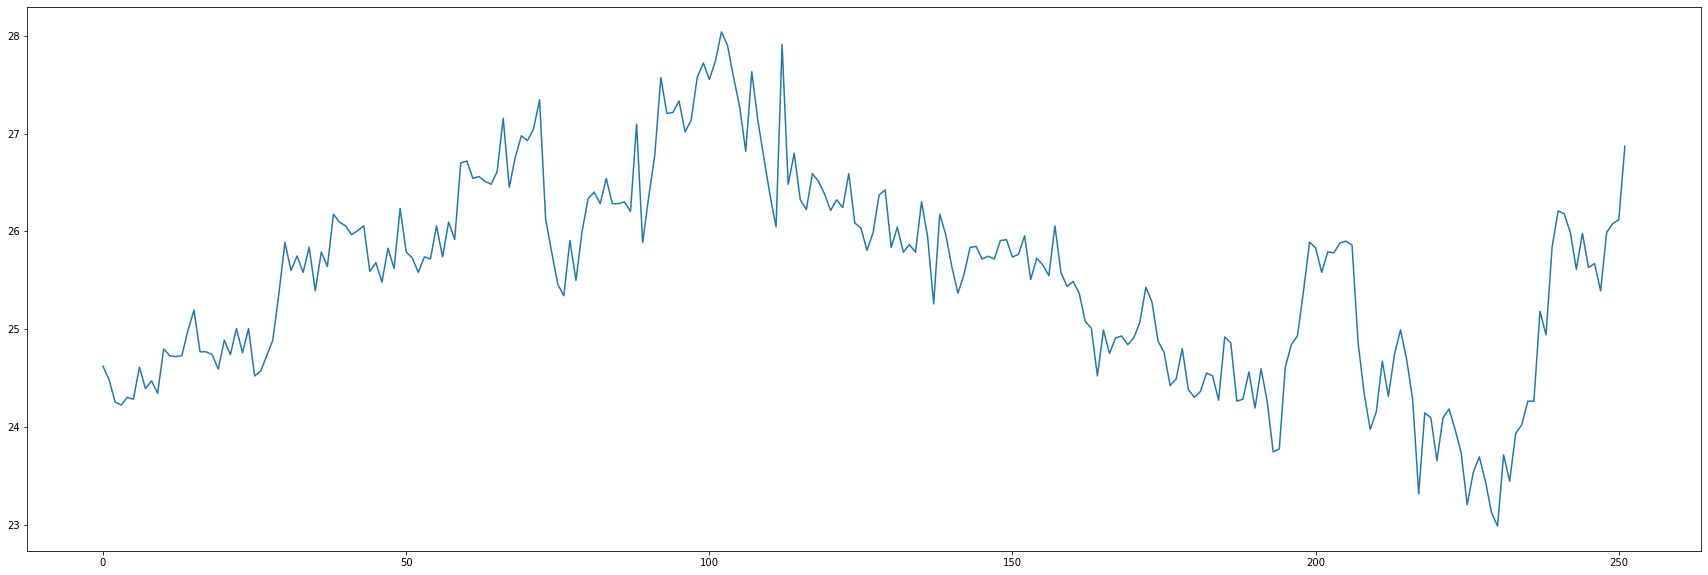

In [7]:
plt.figure(figsize=(30, 10))
plt.plot(x,y)
plt.show()

In [8]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = SEED)

In [9]:
regressor = LinearRegression()

In [10]:
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
print(regressor.intercept_)

[26.13190985]


In [12]:
print(regressor.coef_)

[[-0.00468853]]


In [13]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

score = calc(regressor.coef_, regressor.intercept_, 100)
print(score) 

[[25.66305696]]


In [14]:
score = regressor.predict([[100]])
print(score) 

[[25.66305696]]


In [15]:
y_pred = regressor.predict(X_test)

In [16]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

       Actual  Predicted
0   24.990829  25.358303
1   24.611261  26.103779
2   26.045065  25.611483
3   25.428392  25.325483
4   26.322775  25.592729
5   24.523434  25.273909
6   25.890509  25.198893
7   24.264872  25.030106
8   24.344070  26.089713
9   25.887840  25.991254
10  26.719101  25.850598
11  24.145193  25.109811
12  23.536827  25.072302
13  25.438337  25.386434
14  26.759174  25.813090
15  25.905733  25.438008
16  24.843319  25.212958
17  25.195122  26.061582
18  27.741068  25.658368
19  25.007101  26.019385
20  26.302938  25.728696
21  24.591469  26.042828
22  26.590565  25.583352
23  26.084736  25.550532
24  25.581064  25.977188
25  25.990240  24.997286
26  24.861551  25.259843
27  24.095327  25.105122
28  24.799284  26.085025
29  25.080332  25.372368
30  25.637230  25.475516
31  27.017044  25.681811
32  26.035015  25.545844
33  26.283104  25.747450
34  24.743587  25.133253
35  24.522196  26.014697
36  26.749254  25.620860
37  24.739908  26.047516
38  25.900482  25.170761


In [17]:
regressor.predict([[300]])

array([[24.7253512]])

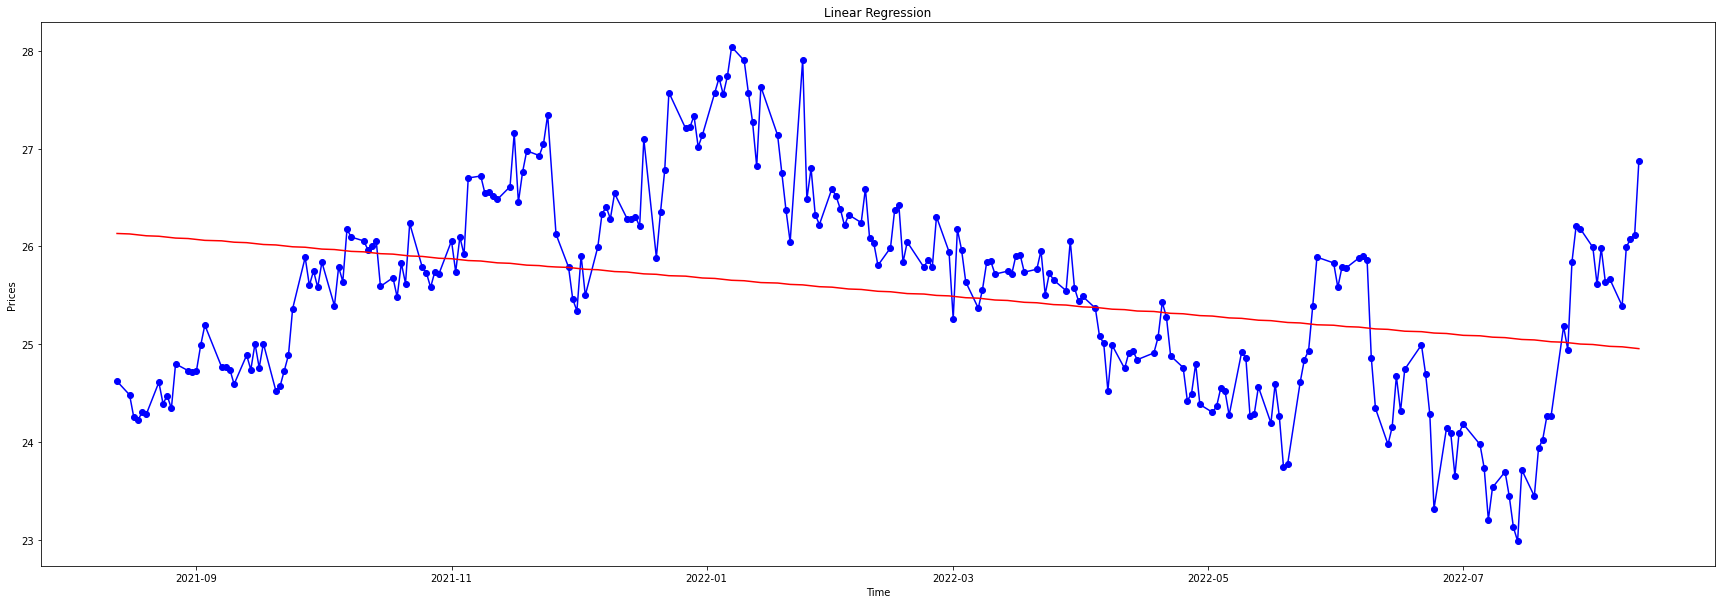

In [18]:
plt.figure(figsize=(30, 10))
plt.plot(X,y,color = 'blue')
plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor.predict(x), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.show()

In [19]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)
poly.fit(X_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [20]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

score = calc(lin2.coef_, lin2.intercept_, 100)
print(score) 
y_pred = lin2.predict(poly.fit_transform(X_test))
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

[[24.31955372 26.58072377 24.36591128 24.31895259 24.31955528]]
       Actual  Predicted
0   24.990829  25.234276
1   24.611261  24.470634
2   26.045065  26.688858
3   25.428392  24.992735
4   26.322775  26.637557
5   24.523434  24.643282
6   25.890509  24.277193
7   24.264872  24.812863
8   24.344070  24.556329
9   25.887840  25.265457
10  26.719101  26.248921
11  24.145193  24.246007
12  23.536827  24.427842
13  25.438337  25.444591
14  26.759174  26.444226
15  25.905733  25.819907
16  24.843319  24.327668
17  25.195122  24.743535
18  27.741068  26.762668
19  25.007101  25.051331
20  26.302938  26.722834
21  24.591469  24.877329
22  26.590565  26.607416
23  26.084736  26.479393
24  25.581064  25.373050
25  25.990240  25.266899
26  24.861551  24.558779
27  24.095327  24.261376
28  24.799284  24.586173
29  25.080332  25.339438
30  25.637230  26.071074
31  27.017044  26.769566
32  26.035015  26.458363
33  26.283104  26.681881
34  24.743587  24.197716
35  24.522196  25.086749
36  26.7492

In [25]:
t= 0
x = []
for i in X:
    x.append([t])
    t+=1


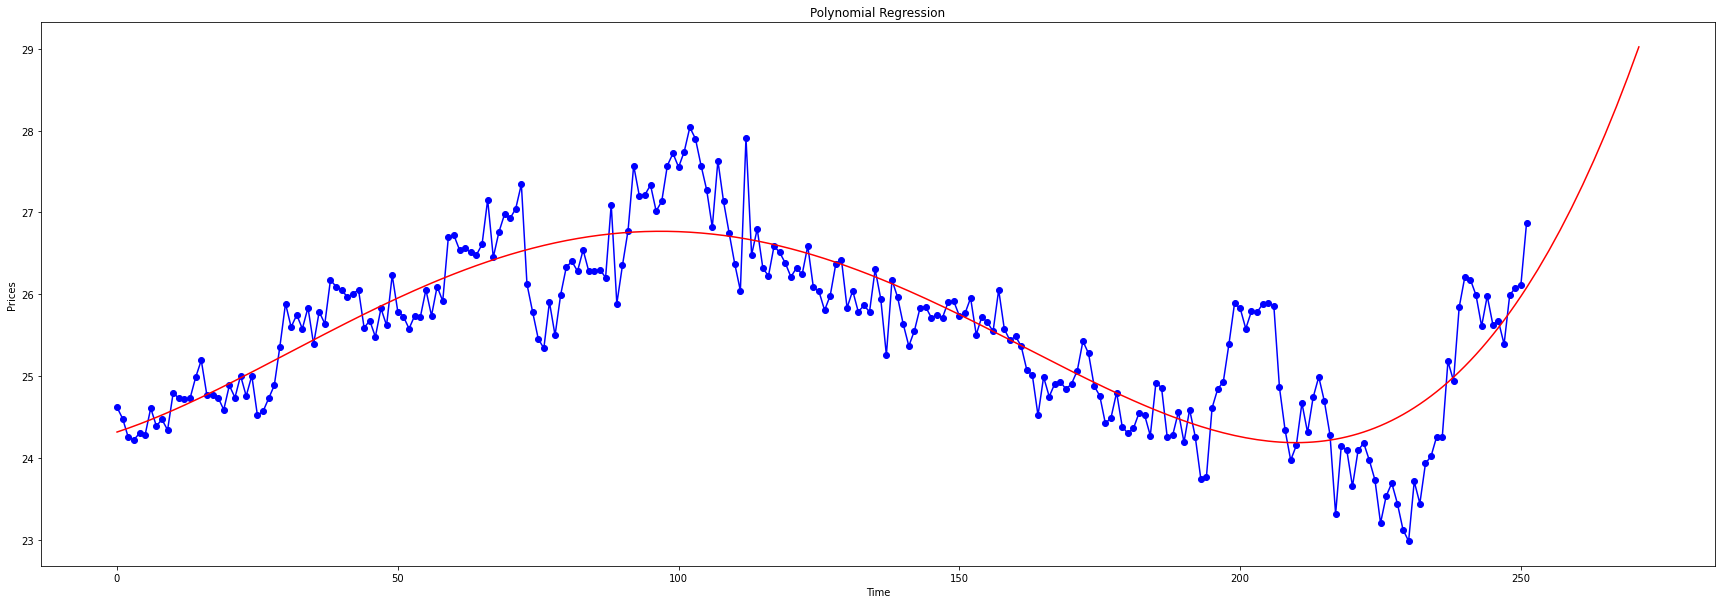

In [26]:
for i in range(10):
    x.append([len(x)+1+i])

plt.figure(figsize=(30, 10))
plt.plot(range(len(y)),y,color = 'blue')
plt.scatter(range(len(y)), y, color = 'blue')
plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.show()

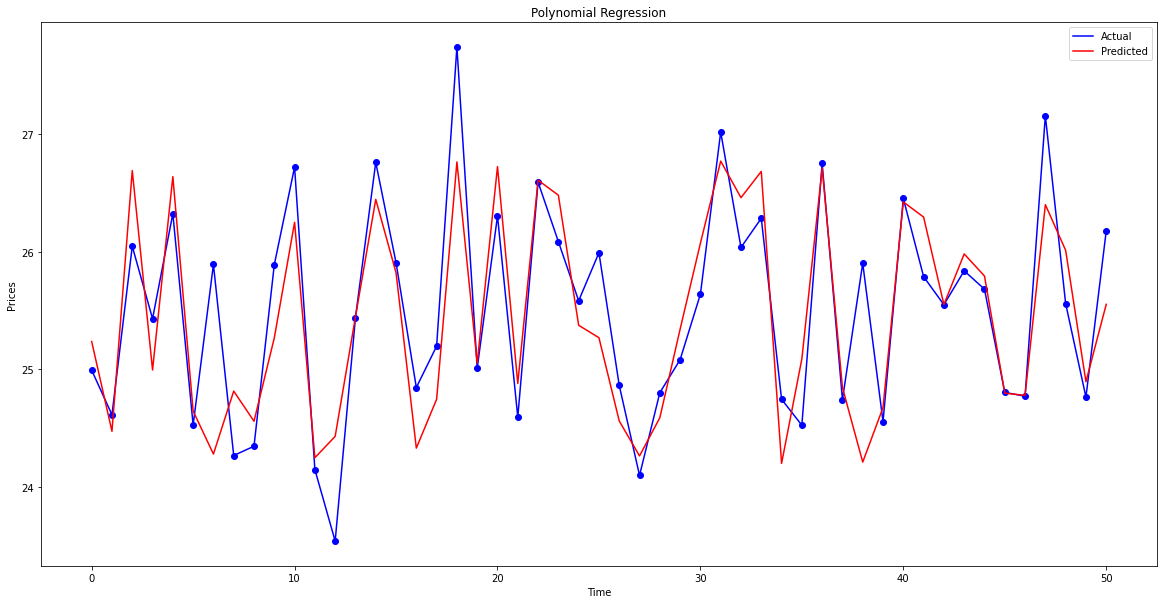

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(range(51),df_preds['Actual'],color = 'blue')
plt.scatter(range(51),df_preds['Actual'], color = 'blue') #Actual
plt.plot(range(51), df_preds['Predicted'], color = 'red') #predictions
plt.legend(['Actual','Predicted'])
plt.title('Polynomial Regression')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.show()